<a href="https://colab.research.google.com/github/NUELBUNDI/Machine-Learning-Projects/blob/main/ML_Linear_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file/Link Below containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

Source Material:

https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
# Install of Packages

# !pip install plotly matplotlib seaborn --quiet
# !pip install pandas-profiling --quiet

In [3]:
from urllib.request import urlretrieve

urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f9712dd8590>)

In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df.head(2)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
print(f'The Rows x Columns are {medical_df.shape}')

The Rows x Columns are (1338, 7)


In [6]:
print(f' Data Information is \n {medical_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
 Data Information is 
 None


In [7]:
# Some statistics for the numerical columns
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Exploratory Analysis and Visualization**

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [9]:
fig= px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

## Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot

In [10]:
fig=px.histogram(medical_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['green'],
                 title='Distribution of BMI')
fig.update_layout(bargap=0.2)
fig.show()

In [11]:
medical_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [12]:
fig= px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['red','blue'],
                  title='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [13]:
medical_df.smoker.value_counts()

px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [14]:
px.histogram(medical_df,x='smoker',color='region',title='Smokers by Region')

In [15]:
smokers=medical_df[medical_df['smoker']=='yes']['region'].value_counts()
print(smokers)

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64


### Age Vs Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [16]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               trendline='ols',
               hover_data=['sex'],
               title='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [17]:
fig=px.scatter(medical_df,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex','region'],
               title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30

### Correlation

In [18]:
print(f' the correlation btwn charges and age is : {medical_df.charges.corr(medical_df.age)}')

print(f' the correlation btwn charges and BMI is  : {medical_df.charges.corr(medical_df.bmi)}')

 the correlation btwn charges and age is : 0.2990081933306476
 the correlation btwn charges and BMI is  : 0.19834096883362895


In [19]:
#To compute the correlation for categorical columns, they must first be converted into numeric columns.

smoker_values ={'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)

print(f' the correlation btwn charges and SMoker is  : {medical_df.charges.corr(smoker_numeric)}')

 the correlation btwn charges and SMoker is  : 0.787251430498478


In [20]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

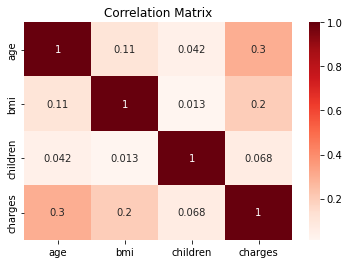

In [21]:
sns.heatmap(medical_df.corr(),cmap='Reds',annot =True)
plt.title('Correlation Matrix')

### Correlation vs causation fallacy: 

Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
X
 and 
Y
 can be correlated if 
X
 causes 
Y
 or if 
Y
 causes 
X
, or if both are caused independently by some other factor 
Z
, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
X
 are 
Y
 simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insigh

### Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [22]:
non_smoker_df=medical_df[medical_df.smoker=='no']
print(non_smoker_df.head(2))

   age   sex    bmi  children smoker     region    charges
1   18  male  33.77         1     no  southeast  1725.5523
2   28  male  33.00         3     no  southeast  4449.4620


Next, let's visualize the relationship between "age" and "charges" of the Non-Smokers

In [23]:


fig=px.scatter(non_smoker_df,x='age',
               y='charges',
               title=' Non Smokers: Age vs Charges',
               trendline='ols')

fig.update_traces(marker_size=5)
fig.show()

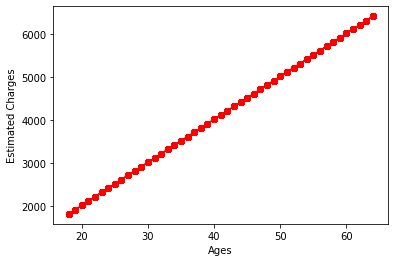

In [24]:
# Fit a model

# y=bo + b1x



def estimate_charge(age,bo,b1):
    return b1 * age + bo

#Guess values of w and b and using them to estimate


ages=non_smoker_df.age
estimated_charges=estimate_charge(ages,20,100)


# We can plot the estimated charges using a line graph

plt.plot(ages,estimated_charges, 'r-o')
plt.xlabel('Ages')
plt.ylabel('Estimated Charges')
plt.show()


We can overlay this line on the actual data, so see how well our model fits the data.

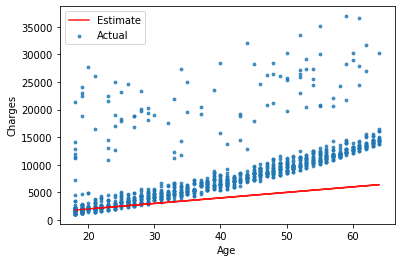

In [25]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of 
w
 and 
b
 to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [26]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charge(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

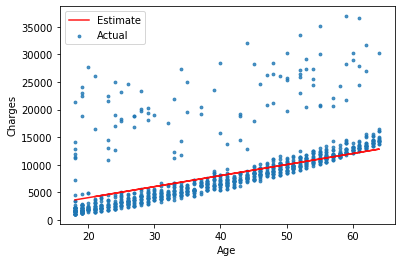

In [27]:
try_parameters(60, 200)

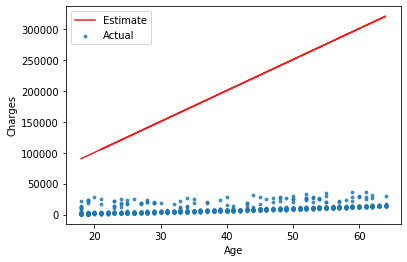

In [28]:
try_parameters(400, 5000)

Let's define a function to compute the RMSE.

In [29]:
import numpy as np

In [30]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [31]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    predictions = estimate_charge(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss=rmse(target,predictions)
    print(f'RMSE LOSS:  {loss}')

RMSE LOSS:  6852.558646496048


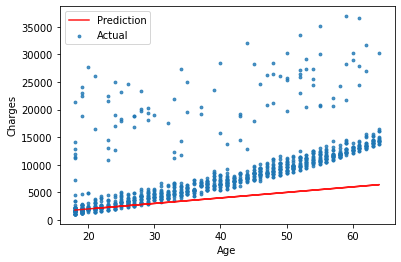

In [32]:
try_parameters(60,100)

### Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)
Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

# **Linear Regression using Scikit-learn**

In [33]:
# pip install scikit-learn --quiet

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression() # Create an Instance or new model object

In [36]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [37]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

print(inputs.shape)
print()
print(targets.shape)

(1064, 1)

(1064,)


In [38]:
model.fit(inputs,targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61



In [39]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Let compute the predictions for the entire set of input

In [40]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [41]:
rmse(targets, predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.


The parameters of the model are stored in the coef_ and intercept_ properties.

In [42]:
print(model.coef_) 


[267.24891283]


In [43]:
model.intercept_

-2091.4205565650864

Let's visualize the line created by the above parameters.

RMSE LOSS:  96547.05111160583


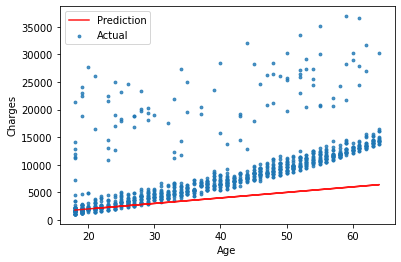

In [44]:
try_parameters(model.coef_, model.intercept_)

In Summary



In [45]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


**Linear Regression using Multiple Features**


In [46]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [47]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [48]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


**Using Categorical Features for Machine Learning**


So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

**Binary Categories**

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes"

In [53]:
medical_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


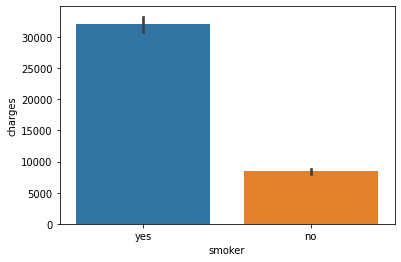

In [58]:
sns.barplot(data=medical_df,x='smoker' ,y ='charges')

In [59]:
smoker_codes= {'no': 0   , 'yes': 1}

medical_df['smoker_codes']=medical_df.smoker.map(smoker_codes)

medical_df.head(2)

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.90,0,yes,southwest,16884.9240,1
1,18,male,33.77,1,no,southeast,1725.5523,0


In [62]:
print('The correlation btw medical charges and smokers')
medical_df.charges.corr(medical_df.smoker_codes)

The correlation btw medical charges and smokers


0.787251430498478

We can now use the smoker_df column for linear regression.

c
h
a
r
g
e
s
=
w
1
×
a
g
e
+
w
2
×
b
m
i
+
w
3
×
c
h
i
l
d
r
e
n
+
w
4
×
s
m
o
k
e
r
+
b

In [69]:
#Create inputs and targets

inputs ,targets = medical_df[['age','bmi','children','smoker_codes']] , medical_df['charges']

#Create and train  the model

model=LinearRegression().fit(inputs, targets)

print(f' The model coefficent  are :{model.coef_}')

print(f' The model intercept  is : {model.intercept_}')


#Generate predictions

predictions= model.predict(inputs)

#Compute loss to evaluate the model

loss= rmse(targets, predictions)
print(f' Loss : {loss}')

 The model coefficent  are :[  257.84950728   321.85140247   473.50231561 23811.3998446 ]
 The model intercept  is : -12102.769362727897
 Loss : 6056.439217188081


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.



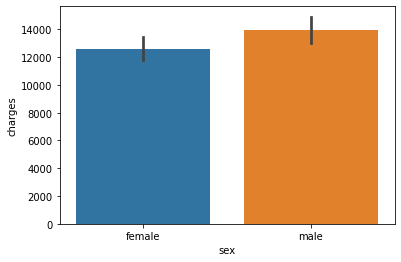

In [72]:
# Add the sex column


sns.barplot(data= medical_df, y ='charges' ,x='sex')

In [74]:
# Changing binary data

sex_codes= {'female': 0 , 'male': 1}

medical_df['sex_codes'] = medical_df.sex.map(sex_codes)

medical_df.head(2)

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes
0,19,female,27.90,0,yes,southwest,16884.9240,1,0
1,18,male,33.77,1,no,southeast,1725.5523,0,1


In [78]:
# Introducing to our model

inputs ,targets =medical_df[['age','bmi','children','smoker_codes','sex_codes']] , medical_df['charges']
model= LinearRegression().fit(inputs, targets)

print(f'Model coeffiecent are :{model.coef_}\n')
print(f'Model Intercept is : {model.intercept_}\n')


# Generate predictions

predictions= model.predict(inputs)

print(predictions, end=" ,")

#Compute the loss to evaluate the model

loss= rmse(targets,predictions)
print()
print(f' The Loss :{loss}')

Model coeffiecent are :[  257.73498767   322.36421449   474.41112061 23823.39253065
  -128.63985357]

Model Intercept is : -12052.461985664737

[25661.85689486  3818.77858262  7096.73025538 ...  4465.88909619
  1676.96948913 36863.89250792] ,
 The Loss :6056.100708754546


As you might expect, this does have a significant impact on the loss.





**One-hot Encoding**

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region

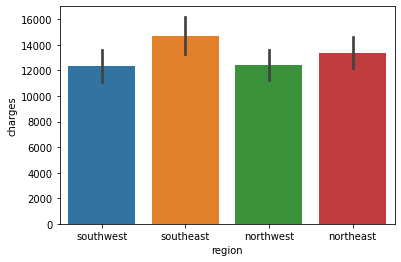

In [80]:
# The regions

sns.barplot(data= medical_df, x='region', y='charges')
plt.show()

In [83]:
from sklearn import preprocessing

enc= preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [84]:
one_hot = enc.transform(medical_df[['region']]).toarray()

one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [86]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [91]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model= LinearRegression().fit(inputs, targets)

print(f'Model coeffiecent are :{model.coef_}\n')
print(f'Model Intercept is : {model.intercept_}\n')


# Generate predictions

predictions= model.predict(inputs)

print(predictions, end=" ,")

#Compute the loss to evaluate the model

loss= rmse(targets,predictions)
print()
print(f' The Loss :{loss}')



Model coeffiecent are :[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]

Model Intercept is : -12525.547811195444

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757] ,
 The Loss :6041.6796511744515


## Model Improvements

Let's discuss and apply some more improvements to our model.

Feature Scaling
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

c
h
a
r
g
e
s
=
w
1
×
a
g
e
+
w
2
×
b
m
i
+
w
3
×
c
h
i
l
d
r
e
n
+
w
4
×
s
m
o
k
e
r
+
w
5
×
s
e
x
+
w
6
×
r
e
g
i
o
n
+
b
To compare the importance of each feature in the model, our first instinct might be to compare their weight

In [92]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [93]:
model.intercept_

-12525.547811195444

In [94]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

We can't compare the weights of different column to identify which features are important
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

We can apply scaling using the StandardScaler class from scikit-learn.



In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
numerical_cols=['age','bmi','children']

scaler= StandardScaler()

scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [98]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [99]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [100]:
scaled_inputs= scaler.transform(medical_df[numerical_cols])

scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [103]:
cat_cols = ['smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']

categorical_data = medical_df[cat_cols].values

inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)


print(f'Model coeffiecent are :{model.coef_}\n')
print(f'Model Intercept is : {model.intercept_}\n')


# Generate predictions

predictions= model.predict(inputs)

print(predictions, end=" ,")

#Compute the loss to evaluate the model

loss= rmse(targets,predictions)
print()
print(f' The Loss :{loss}')


Model coeffiecent are :[ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]

Model Intercept is : 8466.48321541183

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757] ,
 The Loss :6041.6796511744515


Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.[link text]

In [106]:
from sklearn.model_selection import train_test_split


In [107]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [108]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 4707.459230162244


In [109]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6174.167737628971


We've covered the following topics in this tutorial:

A typical problem statement for machine learning

Downloading and exploring a dataset for machine learning

Linear regression with one variable using Scikit-learn

Linear regression with multiple variables

Using categorical features for machine learning

Regression coefficients and feature importance

Creating a training and test set for reporting results
